  <h1 style="text-align: center;">DA6 New York Airbnb Data Analysis</h1> 

<div style="text-align: center;">
  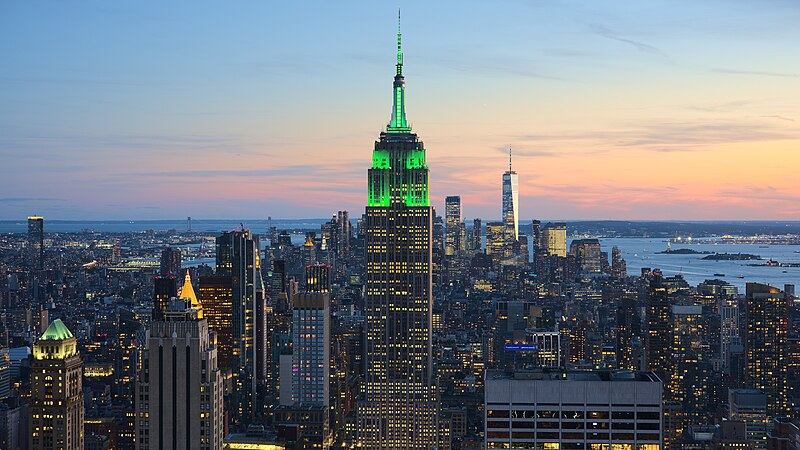
</div>

### Quick Overview

This is my first real Project.In the following i will analyze three different sets of Data from Airbnb's all across New York and analyze it so the viewer gets a good overview of how the vacation/living industry has changed.With New York being one of the worlds most dense and visited city im sure we will find out about the different airbnb prices,locations,etc.Let's get started.

We will focus our analysis on three files which will be:
1. <samp>"datasets/airbnb_price.csv"</samp>
2. <samp>"datasets/airbnb_room_type.xlsx"</samp>
3. <samp>"datasets/airbnb_last_review.tsv"</samp>

Our goals are to convert untidy data into appropriate formats to analyze, and answer key questions including:
*  What is the average price, per night, of an Airbnb listing in NYC? 
*  How does the average price of an Airbnb listing, per month, compare to the private rental market?
*  How many adverts are for private rooms? 
*  How do Airbnb listing prices compare across the five NYC boroughs?


Let's get started with the fun part! 🔎

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

# Load csv file, prices
prices = pd.read_csv("D:/Desktop/Projects/NewYorkAirBnB Project/airbnb_price.csv")

# Load Excel File, room type(xls) 
xls = pd.ExcelFile("D:/Desktop/Projects/NewYorkAirBnB Project/airbnb_room_type.xlsx")

# Parse the first sheet from xls
room_types = xls.parse(0) #parse(0) reads in the first table if there'd be multiple

# Load tsv file, reviews (tab seperated values) 
reviews = pd.read_csv("D:/Desktop/Projects/NewYorkAirBnB Project/airbnb_last_review.tsv", sep="\t")

# Print the first five rows of each DataFrame
print(
    f"prices: {prices.head()}", #f -> formatted string used for values within the string
    "\n",                       #\n -> next line(style decision) 
    f"room_types: {room_types.head()}",
    "\n",
    f"reviews: {reviews.head()}"
    )


prices:    listing_id        price                nbhood_full
0        2595  225 dollars         Manhattan, Midtown
1        3831   89 dollars     Brooklyn, Clinton Hill
2        5099  200 dollars     Manhattan, Murray Hill
3        5178   79 dollars  Manhattan, Hell's Kitchen
4        5238  150 dollars       Manhattan, Chinatown 
 room_types:    listing_id                                description        room_type
0        2595                      Skylit Midtown Castle  Entire home/apt
1        3831            Cozy Entire Floor of Brownstone  Entire home/apt
2        5099  Large Cozy 1 BR Apartment In Midtown East  Entire home/apt
3        5178            Large Furnished Room Near B'way     private room
4        5238         Cute & Cozy Lower East Side 1 bdrm  Entire home/apt 
 reviews:    listing_id    host_name   last_review
0        2595     Jennifer   May 21 2019
1        3831  LisaRoxanne  July 05 2019
2        5099        Chris  June 22 2019
3        5178     Shunichi  June 24

### Adjusting the price column

In [2]:
print(prices["price"].info())

<class 'pandas.core.series.Series'>
RangeIndex: 25209 entries, 0 to 25208
Series name: price
Non-Null Count  Dtype 
--------------  ----- 
25209 non-null  object
dtypes: object(1)
memory usage: 197.1+ KB
None


We can see that the column prices doesnt actually contain numbers(for python at least).To progress with our
calculations we have to clean our Data a little bit and make sure that the prices are actual integers that
Python can work with.

In [3]:
# Remove whitespaces and string characters in the prices column
prices["price"] = prices["price"].str.replace(" dollars", "")

# Convert the prices columns values 
prices["price"] = pd.to_numeric(prices["price"])

print("\n")

# Print 1st 5 rows
print(prices["price"].head())

print("\n")

# Print descriptive statistics for the price column
print(prices["price"].describe())



0    225
1     89
2    200
3     79
4    150
Name: price, dtype: int64


count    25209.000000
mean       141.777936
std        147.349137
min          0.000000
25%         69.000000
50%        105.000000
75%        175.000000
max       7500.000000
Name: price, dtype: float64


### Quick Overview

Thanks to the describe() funkction in pandas we can get a rough look upon the overall pricing data regarding
the airbnb market.We can see that 75% of all the Airbnb's cost 175\\$ or less per night.

From the first glance we can also extract, that the mean price per night is around 141\\$.
Quite striking is the fact that the standard deviation is larger than the average price per night, which shows 
that we have a very scattered range of prices which gets us the last point.

The highest selling apartment is 7500$ per night!(Outlier detected 🕵️‍♂️)

However, we know that a small part of the listings are free so lets get rid of them and calculate again:

In [4]:
# Subset prices for free listings -> "free_listings"
free_listings = prices["price"] == 0

print(type(free_listings))

print(free_listings.shape)

print(free_listings.head())

count_true = free_listings.sum()

print("Number of free listings:", count_true)


<class 'pandas.core.series.Series'>
(25209,)
0    False
1    False
2    False
3    False
4    False
Name: price, dtype: bool
Number of free listings: 7


We can simply count the bool values because true = 1 and false = 0 and see that there are 7 free listing out
of all total listings.

But now its time to say goodbye to these free listings. 🫡

In [5]:
# Update prices by removing all free listings from prices by negating the boolean values with '~' operator
# Similar to SQL's concept of "NOT IN"
prices = prices.loc[~free_listings]

# Calculate the average price and round to 2 decimal places
avg_price = round(prices["price"].mean(),2)

print("The average price per night for an Airbnb in New York excluding the free listings is ${}.".format(avg_price))


The average price per night for an Airbnb in New York excluding the free listings is $141.82.


As we can see, the average went from 141.78\\$ to an average of 141.82\\$.

### Comparing the costs per month

We just figured out what the average price of an Airbnb in New York per night is.To get a good feeling for how this compares to the average monthly housing cost in New York we will have to calculate a thing or two.
First let's look up the average price for a one room apartment in New York.According to [Zumper](https://www.zumper.com/rent-research) we currently are at 4,215\\$ per month.

In [6]:
prices.head()

,listing_id,price,nbhood_full
0,2595,225,"Manhattan, Midtown"
1,3831,89,"Brooklyn, Clinton Hill"
2,5099,200,"Manhattan, Murray Hill"
3,5178,79,"Manhattan, Hell's Kitchen"
4,5238,150,"Manhattan, Chinatown"


In [7]:
# Add new column to prices DF -> price_per_month
prices["price_per_month"] = prices["price"] * 365 / 12

# Calculate average_price_per_month
average_price_per_month = round(prices["price_per_month"].mean(),2)                     
                                                       
# Compare Airbnb and rental market
print("Airbnb's monthly costs are ${}, while in the private market you would pay {}.".format(average_price_per_month, "4,215.00$"))

Airbnb's monthly costs are $4313.61, while in the private market you would pay 4,215.00$.


As we can see these two are seeming to be close together.These numbers are explainable through the fact that i am 
conducting this analysis in May 2024 (so is [Zumper](https://www.zumper.com/rent-research)), while the Datasets i use
for this practice comparison are quite outdated.(About 5 years)

Nonetheless it is quite interesting to see how over the years the average housing has risen up to the price of Airbnb's
at least in New York.But i think i can speak on behalf of everyone that the last years havent been the easiest for us when it comes
to housing prices.

But let's focus on analyzing again!

### Room Types

To get a deeper understanding of how the prices behave we should also look on the Airbnb's themselves in regards to room types.At first glance, we see that there are a few issues regarding the spelling.For example looking at private rooms we find out that in our Data it is spelled in three different ways:

* "Private room"
* "private room"
* "PRIVATE ROOM"

Now let's work on fixing that issue.

In [8]:
room_types.head()

,listing_id,description,room_type
0,2595,Skylit Midtown Castle,Entire home/apt
1,3831,Cozy Entire Floor of Brownstone,Entire home/apt
2,5099,Large Cozy 1 BR Apartment In Midtown East,Entire home/apt
3,5178,Large Furnished Room Near B'way,private room
4,5238,Cute & Cozy Lower East Side 1 bdrm,Entire home/apt


In [9]:
# Convert room_type column to lowercase
room_types["room_type"] = room_types["room_type"].str.lower()

# Update the room_type column to category data type -> category
# https://pandas.pydata.org/docs/user_guide/categorical.html->fast and uses less memory (strings->numerical)
room_types["room_type"] = room_types["room_type"].astype("category")

# Create the variable room_frequencies
room_frequencies = room_types["room_type"].value_counts()

# get the results
print(room_frequencies)

room_type
entire home/apt    13266
private room       11356
shared room          587
Name: count, dtype: int64


In [10]:
entire_home_apt = round((13266/25209)*100,2)

private_room = round((11356/25209)*100,2)

print("We can see that entire homes/apt is at %s%% and private rooms are about %s%%." % (entire_home_apt, private_room))

We can see that entire homes/apt is at 52.62% and private rooms are about 45.05%.


It seems there is a roughly similar sized market opportunities for both private rooms (45% of listings) and entire homes/apartments (52%) on the Airbnb platform in New York.Now let's take a look at the timeframe! 

### What timeframe are we considering?

Now let's take a look on the reviews DataFrame. The `last_review` column contains the date of the last review in the format of "Month Day Year" e.g., October 30 2023. We've been asked to find out the earliest and latest review dates in the DataFrame and make sure there are no complications with the Datatypes.

In [11]:
reviews.head()

,listing_id,host_name,last_review
0,2595,Jennifer,May 21 2019
1,3831,LisaRoxanne,July 05 2019
2,5099,Chris,June 22 2019
3,5178,Shunichi,June 24 2019
4,5238,Ben,June 09 2019


In [12]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25209 entries, 0 to 25208
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   host_name    25201 non-null  object
 2   last_review  25209 non-null  object
dtypes: int64(1), object(2)
memory usage: 591.0+ KB


In [13]:
# Change data type of last_review column to datetime
# https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
reviews["last_review"] = pd.to_datetime(reviews["last_review"]) # YYYY-MM-DD

print(type(reviews["last_review"]))


<class 'pandas.core.series.Series'>


In [14]:
# Create first_reviewed (earliest review date)
first_reviewed = reviews["last_review"].dt.date.min()

# Create last_reviewed (the most recent review date)
last_reviewed = reviews["last_review"].dt.date.max()

# Print the oldest and newest reviews from the DataFrame in formatted String again
print("The latest Airbnb review is {}, the earliest review is {}".format(last_reviewed, first_reviewed))

The latest Airbnb review is 2019-07-09, the earliest review is 2019-01-01


In [15]:
print(reviews.dtypes["last_review"])
reviews["last_review"].head()

datetime64[ns]


0   2019-05-21
1   2019-07-05
2   2019-06-22
3   2019-06-24
4   2019-06-09
Name: last_review, dtype: datetime64[ns]

### Join the Data Frames

To make further progress in our brief analysis it will make things easier for us if we join these three Dataframes
together.Once we have joined the data, we will remove any observations with missing values and check for duplicates.
Since all these tables share the column of the `listing_id` it will be really easy to join them together.

In [16]:
# https://pandas.pydata.org/docs/user_guide/merging.html
rooms_and_prices = pd.merge(prices, room_types, 
                            how="outer", 
                            on="listing_id")

# Merge rooms_and_prices with the reviews DataFrame to create airbnb_merged
airbnb_merged = pd.merge(rooms_and_prices, reviews, 
                         how="outer", 
                         on="listing_id")

# Drop missing values from airbnb_merged (inplace=False would produce a cleaned copy of our merged df) 
airbnb_merged.dropna(inplace=True)

# Check if there are any duplicate values
print("There are {} duplicates in the DataFrame.".format(airbnb_merged.duplicated().sum()))

There are 0 duplicates in the DataFrame.


Just as expected! 😃

In [17]:
print(airbnb_merged.info())
print("\n")
airbnb_merged.head()

<class 'pandas.core.frame.DataFrame'>
Index: 25184 entries, 0 to 25201
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   listing_id       25184 non-null  int64         
 1   price            25184 non-null  float64       
 2   nbhood_full      25184 non-null  object        
 3   price_per_month  25184 non-null  float64       
 4   description      25184 non-null  object        
 5   room_type        25184 non-null  category      
 6   host_name        25184 non-null  object        
 7   last_review      25184 non-null  datetime64[ns]
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 1.6+ MB
None




,listing_id,price,nbhood_full,price_per_month,description,room_type,host_name,last_review
0,2595,225.0,"Manhattan, Midtown",6843.750000,Skylit Midtown Castle,entire home/apt,Jennifer,2019-05-21
1,3831,89.0,"Brooklyn, Clinton Hill",2707.083333,Cozy Entire Floor of Brownstone,entire home/apt,LisaRoxanne,2019-07-05
2,5099,200.0,"Manhattan, Murray Hill",6083.333333,Large Cozy 1 BR Apartment In Midtown East,entire home/apt,Chris,2019-06-22
3,5178,79.0,"Manhattan, Hell's Kitchen",2402.916667,Large Furnished Room Near B'way,private room,Shunichi,2019-06-24
4,5238,150.0,"Manhattan, Chinatown",4562.500000,Cute & Cozy Lower East Side 1 bdrm,entire home/apt,Ben,2019-06-09


### Analyzing the prices by borough

Now we have combined all the data into a single DataFrame, we will turn our attention to understanding the difference in listing prices between [New York's boroughs](https://en.wikipedia.org/wiki/Boroughs_of_New_York_City). We can currently see boroughs listed as the first part of a string within the `nbhood_full column`, e.g.,
* `Manhattan, Midtown`
* `Brooklyn, Clinton Hill`
* `Manhattan, Murray Hill`
* `Manhattan, Hell's Kitchen`
* `Manhattan, Chinatown`

We will therefore need to extract this information from the string and store it in a new column, `borough` for analysis.

In [18]:
# Extract information from the nbhood_full column and store as a new column, borough
# Either use `.str.partition()` or `.str.split()`
# exp = True -> result becomes df not series and [0] gives us the first column and ofc partition by ,
airbnb_merged["borough"] = airbnb_merged["nbhood_full"].str.partition(",", expand=True)[0]

# Group by borough and calculate summary statistics
# SQL-ish and agg. allows several statisical functions 
boroughs = airbnb_merged.groupby("borough")["price"].agg(["sum", "mean", "median", "count"])

# Round boroughs to 2 decimal places, and sort by mean in descending order
# also SQL-ish
boroughs = boroughs.round(2).sort_values("mean", ascending=False)

# Print boroughs
print(boroughs)

                     sum    mean  median  count
borough                                        
Manhattan      1898417.0  184.04   149.0  10315
Brooklyn       1275250.0  122.02    95.0  10451
Queens          320715.0   92.83    70.0   3455
Staten Island    22974.0   86.04    71.0    267
Bronx            55156.0   79.25    65.0    696


### Price ranges per borough

At last we will label the different listings according to their price per night to get a better overview per borough.
These categories will look like this:

|  Label  |  Price  |
|---------|---------|
|  Budget | \\$0-69 |
|  Average| \\$70-175|
|  Expensive| \\$176-350|
|  Extravagant| > \\$350|


In [19]:
# Create labels for price range, label_names
label_names = ["Budget", "Average", "Expensive", "Extravagant"]

# Create the label ranges, ranges
ranges = [0, 69, 175, 350, np.inf]

# Insert new column, price_range, into DataFrame
# Use `pd.cut` to segment and sort data values into bins (up to) 
# Useful for going from a continuous variable to a categorical variable 
airbnb_merged["price_range"] = pd.cut(airbnb_merged["price"], bins=ranges, labels=label_names)

# Calculate borough and price_range frequencies, prices_by_borough
# again results print in SQL-ish fashion
prices_by_borough = airbnb_merged.groupby(["borough", "price_range"], observed=True)["price_range"].agg("count")
print(prices_by_borough)

borough        price_range
Bronx          Budget          381
               Average         285
               Expensive        25
               Extravagant       5
Brooklyn       Budget         3194
               Average        5532
               Expensive      1466
               Extravagant     259
Manhattan      Budget         1148
               Average        5285
               Expensive      3072
               Extravagant     810
Queens         Budget         1631
               Average        1505
               Expensive       291
               Extravagant      28
Staten Island  Budget          124
               Average         123
               Expensive        20
Name: price_range, dtype: int64


Based on the observation, it's clear that price ranges vary significantly across different boroughs in NYC. Brooklyn and Manhattan have the widest range of prices, with a notable number of listings falling into the "Expensive" and "Extravagant" categories. In contrast, the Bronx and Staten Island have fewer listings in the higher price ranges, with the majority falling into the "Budget" and "Average" categories.